# **[Optimisation Problem](https://utexas.instructure.com/courses/1369579/assignments/6461290)**

To formulate the marketing budget allocation problem as a linear program (LP), we need to define decision variables, objective function, and constraints. Let's denote the budget allocation for each medium as follows:

***Variables***:

$x_1$: Budget allocated to Print. </br>
$x_2$: Budget allocated to TV. </br>
$x_3$: Budget allocated to SEO. </br>
$x_4$: Budget allocated to AdWords.</br>
$x_5$: Budget allocated to Facebook.</br>
$x_6$: Budget allocated to LinkedIn.</br>
$x_7$: Budget allocated to Instagram.</br>
$x_8$: Budget allocated to Snapchat.</br>
$x_9$: Budget allocated to Twitter.</br>
$x_{10}$: Budget allocated to Email.</br>

***Objective Function***:
The objective is to maximize the overall ROI: </br>
               <h3><center> $$ Maximize \sum_{i=1}^{10} ROI_i  x_i \quad $$</center></h3>

***Constraints***:
1. **Budget Constraint**:  
$$\sum_{i=1}^{10} x_i \leq 10\$$
    
2. **TV and Print Constraint**: $$x_1 + x_2 \leq x_5 + x_{10}$$

3. **Social media and SEO/AdWords Constraint**: 
$$\sum_{i=5}^{9} x_i \geq 2(x_3 + x_4)\$$

4. **Individual Budget Constraints**: 
$$x_i \leq  3 \quad \text{for all } i = 1, 2, \ldots, 10\$$

4. **Positivity Constraints**: 
$$x_i \geq 0 \quad \text{for all } i = 1, 2, \ldots, 10\$$

## Setup

In [1]:
!pip install gurobipy

In [2]:
import numpy as np
import gurobipy as gp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.lines as mlines


## Data Loading

In [4]:
# Define file paths to csv files to load them into dataframes
roi_csv_filepath = 'ROI_data.csv'

# Loading ROI data in CSV
roi_csv_file_df = pd.read_csv(roi_csv_filepath)

roi_csv_file_df

,Platform,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
0,ROI,0.031,0.049,0.024,0.039,0.016,0.024,0.046,0.026,0.033,0.044
1,Second Firms ROI Estimate,0.049,0.023,0.024,0.039,0.044,0.046,0.026,0.019,0.037,0.026


In [5]:
# Define file paths to csv files to load them into dataframes
month_channel_roi_csv_filepath = 'roi_mat.csv'

# Reading ROI by month by channel data from CSV
df_month_channel_roi = pd.read_csv(month_channel_roi_csv_filepath)

df_month_channel_roi

,Unnamed: 0,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
0,January,4.0,3.6,2.4,3.9,3.0,3.5,3.6,2.25,3.5,3.5
1,February,4.0,3.9,2.7,3.8,4.3,3.2,2.7,1.80,3.7,3.5
2,March,3.5,2.9,3.1,3.8,2.4,4.1,3.7,2.60,4.2,2.5
3,April,3.8,3.1,2.4,4.4,2.4,3.8,3.7,2.50,3.6,2.9
4,May,3.5,3.2,1.9,3.4,2.7,2.7,3.9,2.20,4.5,3.9
5,June,4.0,3.2,2.7,3.4,3.4,3.0,4.5,2.10,3.8,4.1
6,July,3.9,3.6,2.0,4.4,3.9,3.7,4.3,1.80,4.0,3.8
7,August,4.2,3.3,2.8,4.2,2.0,3.7,3.6,1.50,4.4,4.3
8,September,4.1,2.8,2.5,4.2,2.9,3.7,2.8,2.50,4.0,3.4
9,October,3.0,3.0,3.1,4.6,3.1,3.3,3.2,2.30,2.5,3.2


## Question 1, 2, 3 - Estimates from 1st Firm

In [6]:
# Create a Gurobi model
ojMod1 = gp.Model("Budget_Allocation")

Set parameter Username
Academic license - for non-commercial use only - expires 2024-08-23


In [7]:
# Defining decision variables
roi_values_1 = roi_csv_file_df.iloc[0, 1:].tolist()
num_vars = len(roi_values_1)

ojMod1X = ojMod1.addMVar(num_vars, name="x")

In [8]:
# Setting the objective function
obj_coeffs1 = roi_values_1
ojMod1.setObjective(gp.quicksum(obj_coeffs1[i] * ojMod1X[i] for i in range(num_vars)), sense=gp.GRB.MAXIMIZE)

In [9]:
# Create variable names by taking column names
x_names = roi_csv_file_df.columns.tolist()[1:]

# Adding Budget constraint using index since all should have <= 10M constraint anyways
ojMod1.addConstr(gp.quicksum(ojMod1X[i] for i in range(num_vars)) <= 10, name="Budget_Constr")

# Add constraints using variable names assigned by column names
ojMod1.addConstr(ojMod1X[x_names.index("Print")] + ojMod1X[x_names.index("TV")] <= ojMod1X[x_names.index("Facebook")] + ojMod1X[x_names.index("Email")], name="Print_TV_Constr")
ojMod1.addConstr(ojMod1X[x_names.index("Facebook")] + ojMod1X[x_names.index("LinkedIn")] + ojMod1X[x_names.index("Instagram")] + ojMod1X[x_names.index("Snapchat")] + ojMod1X[x_names.index("Twitter")] >= 2 * (ojMod1X[x_names.index("SEO")] + ojMod1X[x_names.index("AdWords")]), name="Social_Media_Constr")

# Again adding Max Alloc constraint using index since all should have <= 3M constraint anyways
for i in range(num_vars):
    ojMod1.addConstr(ojMod1X[i] <= 3, name=f"Max_Alloc_Constraint_{i}")

In [10]:
ojMod1.Params.OutputFlag = 0
ojMod1.optimize()

In [11]:
ojMod1.objVal

0.45600000000000007

In [12]:
ojMod1X.x

array([0., 3., 0., 1., 0., 0., 3., 0., 0., 3.])

In [13]:
budget_alloc_1 = [ojMod1X[i].x for i in range(num_vars)]
var_names = roi_csv_file_df.columns.tolist()[1:]

df_1st = pd.DataFrame({
    "Channel": var_names,
    "Budget Alloc ($M)": budget_alloc_1
})

# Calculate the total budget and total ROI
budget_1 = sum(budget_alloc_1)
roi_1 = sum(obj_coeffs1[i] * budget_alloc_1[i] for i in range(num_vars))

df_1st['Budget Alloc ($M)'] = df_1st['Budget Alloc ($M)'].apply(float)
df_1st['Expected ROI (%)'] = obj_coeffs1
df_1st['ROI($M)'] = df_1st['Expected ROI (%)']*df_1st['Budget Alloc ($M)']


# Print the DataFrame
print(f"1st Firm's Optimal Budget Allocation\n{df_1st.iloc[:, :2]}")
print(f"{'Total Budget':25} ${budget_1:.3f}M")
print(f"{'Total ROI':25} ${roi_1:.3f}M")

1st Firm's Optimal Budget Allocation
     Channel  Budget Alloc ($M)
0      Print                0.0
1         TV                3.0
2        SEO                0.0
3    AdWords                1.0
4   Facebook                0.0
5   LinkedIn                0.0
6  Instagram                3.0
7   Snapchat                0.0
8    Twitter                0.0
9      Email                3.0
Total Budget              $10.000M
Total ROI                 $0.456M


Marketing Budget Allocation:


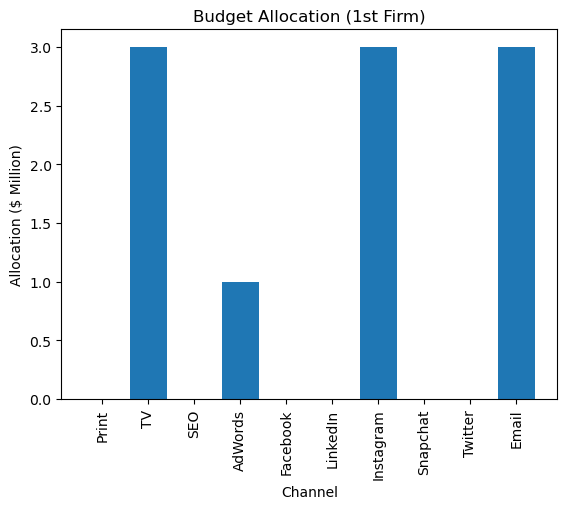

ROI from marketing:


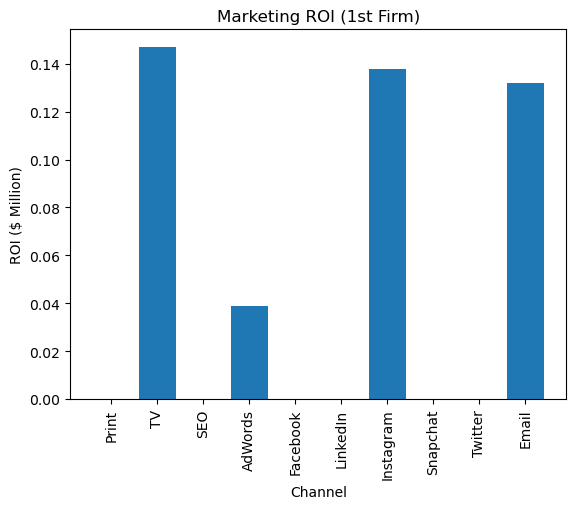

In [14]:
print('Marketing Budget Allocation:')
plt.bar(df_1st['Channel'], df_1st['Budget Alloc ($M)'])
plt.xlabel('Channel')
plt.ylabel('Allocation ($ Million)')
plt.title("Budget Allocation (1st Firm)")
plt.xticks(rotation=90)
plt.show()

print('ROI from marketing:')
plt.bar(df_1st['Channel'], df_1st['ROI($M)'])
plt.xlabel('Channel')
plt.ylabel('ROI ($ Million)')
plt.title("Marketing ROI (1st Firm)")
plt.xticks(rotation=90)
plt.show()

## Question 4 - Estimates from 2nd Firm

In [15]:
# Create a Gurobi model
ojMod2 = gp.Model("Budget_Allocation")

In [16]:
# Define decision variables
roi_values_2 = roi_csv_file_df.iloc[1, 1:].tolist()
num_vars = len(roi_values_1)

ojMod2X = ojMod2.addMVar(num_vars, name="x")

In [17]:
# Set the objective function
obj_coeffs2 = roi_csv_file_df.iloc[1, -10:].tolist()
ojMod2.setObjective(gp.quicksum(obj_coeffs2[i] * ojMod2X[i] for i in range(num_vars)), sense=gp.GRB.MAXIMIZE)

In [18]:
# Create variable names by taking column names
x_names = roi_csv_file_df.columns.tolist()[1:]

# Adding Budget constraint using index since all should have <= 10M constraint anyways
ojMod2.addConstr(gp.quicksum(ojMod2X[i] for i in range(num_vars)) <= 10, name="Budget_Constr")

# Add constraints using variable names assigned by column names
ojMod2.addConstr(ojMod2X[x_names.index("Print")] + ojMod2X[x_names.index("TV")] <= ojMod2X[x_names.index("Facebook")] + ojMod2X[x_names.index("Email")], name="Print_TV_Constr")
ojMod2.addConstr(ojMod2X[x_names.index("Facebook")] + ojMod2X[x_names.index("LinkedIn")] + ojMod2X[x_names.index("Instagram")] + ojMod2X[x_names.index("Snapchat")] + ojMod1X[x_names.index("Twitter")] >= 2 * (ojMod1X[x_names.index("SEO")] + ojMod1X[x_names.index("AdWords")]), name="Social_Media_Constr")

# Again adding Max Alloc constraint using index since all should have <= 3M constraint anyways
for i in range(num_vars):
    ojMod2.addConstr(ojMod2X[i] <= 3, name=f"Max_Alloc_Constraint_{i}")

In [19]:
ojMod2.Params.OutputFlag = 0
ojMod2.optimize()

In [20]:
ojMod2.objVal

0.45600000000000007

In [21]:
ojMod2X.x

array([3., 0., 0., 1., 3., 3., 0., 0., 0., 0.])

In [22]:
budget_alloc_2 = [ojMod2X[i].x for i in range(num_vars)]
var_names = roi_csv_file_df.columns.tolist()[1:]

df_2nd = pd.DataFrame({
    "Channel": var_names,
    "Budget Alloc ($M)": budget_alloc_2
})

# Calculate the total budget and total ROI
budget_2 = sum(budget_alloc_2)
roi_2 = sum(obj_coeffs2[i] * budget_alloc_2[i] for i in range(num_vars))

df_2nd['Budget Alloc ($M)'] = df_2nd['Budget Alloc ($M)'].apply(float)
df_2nd['Expected ROI (%)'] = obj_coeffs2
df_2nd['ROI($M)'] = df_2nd['Expected ROI (%)']*df_2nd['Budget Alloc ($M)']


# Print the DataFrame
print(f"2nd Firm's Optimal Budget Allocation\n{df_2nd.iloc[:,:2]}")
print(f"{'Total Budget':25} ${budget_2:.3f}M")
print(f"{'Total ROI':25} ${roi_2:.3f}M")

2nd Firm's Optimal Budget Allocation
     Channel  Budget Alloc ($M)
0      Print                3.0
1         TV                0.0
2        SEO                0.0
3    AdWords                1.0
4   Facebook                3.0
5   LinkedIn                3.0
6  Instagram                0.0
7   Snapchat                0.0
8    Twitter                0.0
9      Email                0.0
Total Budget              $10.000M
Total ROI                 $0.456M


Marketing Budget Allocation:


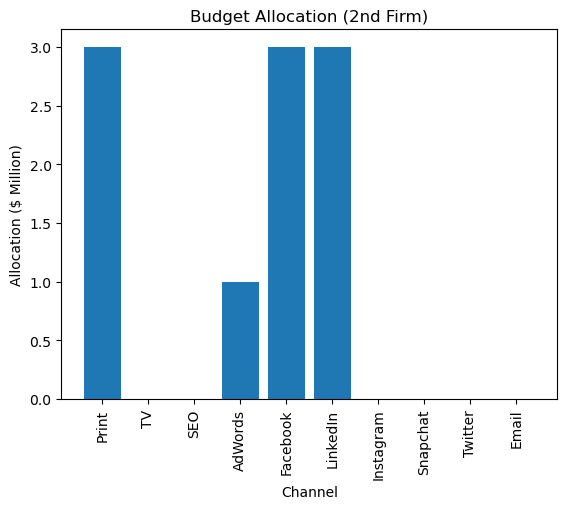

ROI from marketing:


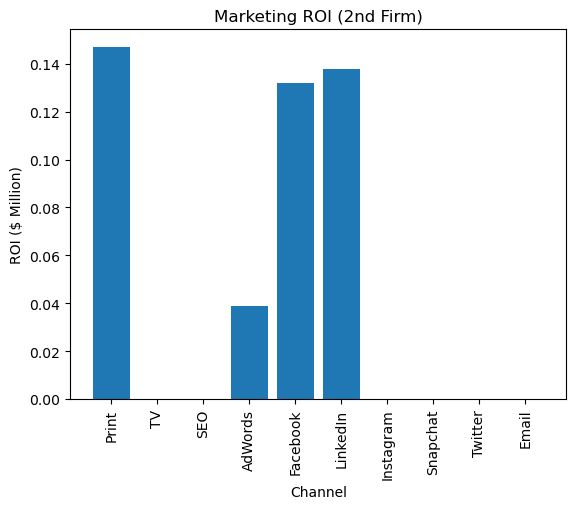

In [23]:
print('Marketing Budget Allocation:')
plt.bar(df_2nd['Channel'], df_2nd['Budget Alloc ($M)'])
plt.xlabel('Channel')
plt.ylabel('Allocation ($ Million)')
plt.title("Budget Allocation (2nd Firm)")
plt.xticks(rotation=90)
plt.show()

print('ROI from marketing:')
plt.bar(df_2nd['Channel'], df_2nd['ROI($M)'])
plt.xlabel('Channel')
plt.ylabel('ROI ($ Million)')
plt.title("Marketing ROI (2nd Firm)")
plt.xticks(rotation=90)
plt.show()

## Question 5 - Allocation Comparison, Combining ROIs and Allocations, Checking for 3rd Constraints Significance

### Comparison

In [24]:
df_1st_and_2nd = pd.merge(df_1st, df_2nd, on='Channel', suffixes=('_df1', '_df2'))
df_1st_and_2nd.rename(
    columns={
      'Budget Alloc ($M)_df1': 'Budget Alloc ($M) 1st Firm',
      'Budget Alloc ($M)_df2': 'Budget Alloc ($M) 2nd Firm',
      'ROI($M)_df1': 'ROI ($M) 1st Firm',
      'ROI($M)_df2': 'ROI ($M) 2nd Firm'
    },
    inplace=True
)

df_1st_and_2nd['ROI 1st Firm'] = obj_coeffs1
df_1st_and_2nd['ROI 2nd Firm'] = obj_coeffs2

df_1st_and_2nd = df_1st_and_2nd[['Channel', 'ROI 1st Firm','Budget Alloc ($M) 1st Firm','ROI ($M) 1st Firm', 'ROI 2nd Firm', 'Budget Alloc ($M) 2nd Firm','ROI ($M) 2nd Firm']]
df_1st_and_2nd

,Channel,ROI 1st Firm,Budget Alloc ($M) 1st Firm,ROI ($M) 1st Firm,ROI 2nd Firm,Budget Alloc ($M) 2nd Firm,ROI ($M) 2nd Firm
0,Print,0.031,0.0,0.000,0.049,3.0,0.147
1,TV,0.049,3.0,0.147,0.023,0.0,0.000
2,SEO,0.024,0.0,0.000,0.024,0.0,0.000
3,AdWords,0.039,1.0,0.039,0.039,1.0,0.039
4,Facebook,0.016,0.0,0.000,0.044,3.0,0.132
5,LinkedIn,0.024,0.0,0.000,0.046,3.0,0.138
6,Instagram,0.046,3.0,0.138,0.026,0.0,0.000
7,Snapchat,0.026,0.0,0.000,0.019,0.0,0.000
8,Twitter,0.033,0.0,0.000,0.037,0.0,0.000
9,Email,0.044,3.0,0.132,0.026,0.0,0.000


> The two budget allocations are different but yield the same optimal value



Marketing Budget Allocation:


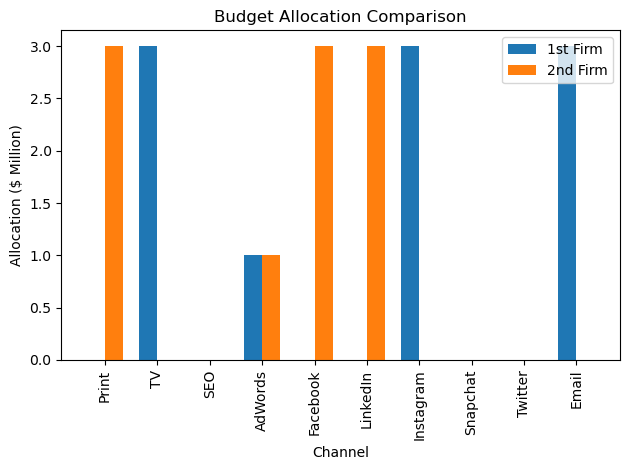

ROI from marketing:


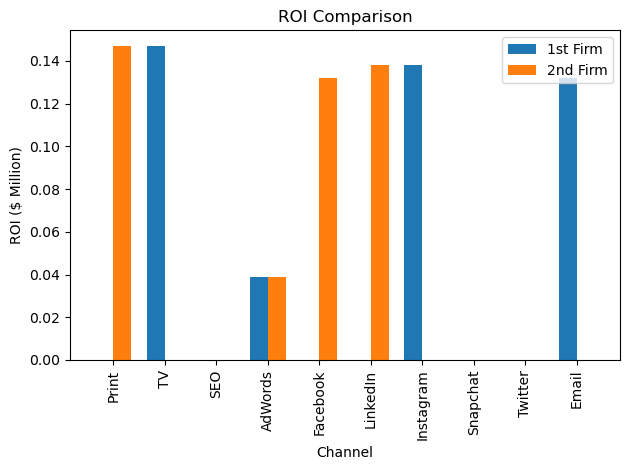

In [25]:
print('Marketing Budget Allocation:')

n_bars = len(df_1st_and_2nd['Channel'])
bar_width = 0.35
index = np.arange(n_bars)

plt.bar(index, df_1st_and_2nd['Budget Alloc ($M) 1st Firm'], width=bar_width, color='#1f77b4', label='1st Firm')
plt.bar(index + bar_width, df_1st_and_2nd['Budget Alloc ($M) 2nd Firm'], width=bar_width, color='#ff7f0e', label='2nd Firm')

plt.xlabel('Channel')
plt.ylabel('Allocation ($ Million)')
plt.title("Budget Allocation Comparison")

plt.xticks(index + bar_width / 2, df_1st_and_2nd['Channel'], rotation=90)

plt.legend()
plt.tight_layout()
plt.show()

print('ROI from marketing:')

n_bars = len(df_1st_and_2nd['Channel'])
bar_width = 0.35
index = np.arange(n_bars)

plt.bar(index, df_1st_and_2nd['ROI ($M) 1st Firm'], width=bar_width, color='#1f77b4', label='1st Firm')
plt.bar(index + bar_width, df_1st_and_2nd['ROI ($M) 2nd Firm'], width=bar_width, color='#ff7f0e', label='2nd Firm')

plt.xlabel('Channel')
plt.ylabel('ROI ($ Million)')
plt.title("ROI Comparison")

plt.xticks(index + bar_width / 2, df_1st_and_2nd['Channel'], rotation=90)

plt.legend()
plt.tight_layout()
plt.show()



### Combinations

In [26]:
# Multiply 'ROI 1st Firm' by 'Budget Alloc ($M) 2nd Firm' and sum the results
df_1st_and_2nd['1st_roi_2nd_alloc'] = df_1st_and_2nd['ROI 1st Firm'] * df_1st_and_2nd['Budget Alloc ($M) 2nd Firm']
roi_1st_alloc_2nd = df_1st_and_2nd['1st_roi_2nd_alloc'].sum()
print(f"1st Firm's ROI with 2nd Firm's Allocation: ${roi_1st_alloc_2nd:.3f}M")
print(f"1st Firm's ROI with 1st Firm's Allocation: ${roi_1:.3f}M")
print(f"Difference in ROI: ${(roi_1-roi_1st_alloc_2nd):.3f}M")

1st Firm's ROI with 2nd Firm's Allocation: $0.252M
1st Firm's ROI with 1st Firm's Allocation: $0.456M
Difference in ROI: $0.204M


ROI change:


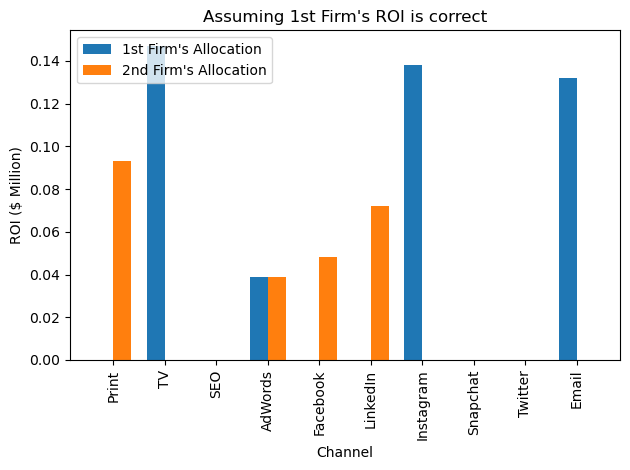

In [27]:
print('ROI change:')

n_bars = len(df_1st_and_2nd['Channel'])
bar_width = 0.35
index = np.arange(n_bars)

plt.bar(index, df_1st_and_2nd['ROI ($M) 1st Firm'], width=bar_width, color='#1f77b4', label="1st Firm's Allocation")
plt.bar(index + bar_width, df_1st_and_2nd['1st_roi_2nd_alloc'], width=bar_width, color='#ff7f0e', label="2nd Firm's Allocation")

plt.xlabel('Channel')
plt.ylabel('ROI ($ Million)')
plt.title("Assuming 1st Firm's ROI is correct")

plt.xticks(index + bar_width / 2, df_1st_and_2nd['Channel'], rotation=90)

plt.legend()
plt.tight_layout()
plt.show()

In [28]:
# Multiply 'ROI 1st Firm' by 'Budget Alloc ($M) 2nd Firm' and sum the results
df_1st_and_2nd['2nd_roi_1st_alloc'] = df_1st_and_2nd['ROI 2nd Firm'] * df_1st_and_2nd['Budget Alloc ($M) 1st Firm']
roi_2nd_alloc_1st = df_1st_and_2nd['2nd_roi_1st_alloc'].sum()
print(f"2nd Firm's ROI with 1st Firm's Allocation: ${roi_2nd_alloc_1st:.3f}M")
print(f"2nd Firm's ROI with 2nd Firm's Allocation: ${roi_2:.3f}M")
print(f"Difference in ROI: ${(roi_2-roi_2nd_alloc_1st):.3f}M")

2nd Firm's ROI with 1st Firm's Allocation: $0.264M
2nd Firm's ROI with 2nd Firm's Allocation: $0.456M
Difference in ROI: $0.192M


ROI change:


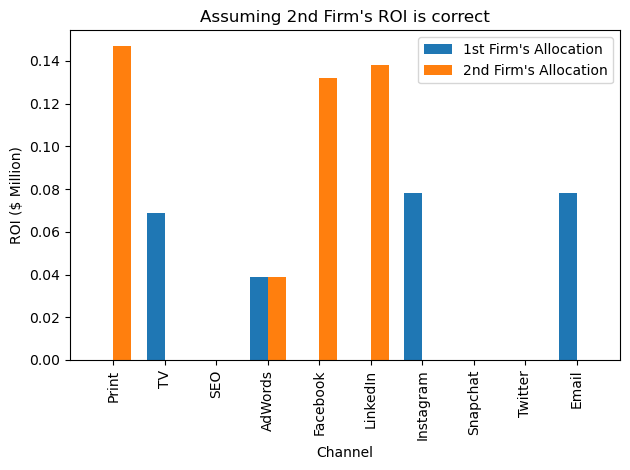

In [29]:
print('ROI change:')

n_bars = len(df_1st_and_2nd['Channel'])
bar_width = 0.35
index = np.arange(n_bars)

plt.bar(index, df_1st_and_2nd['2nd_roi_1st_alloc'], width=bar_width, color='#1f77b4', label="1st Firm's Allocation")
plt.bar(index + bar_width, df_1st_and_2nd['ROI ($M) 2nd Firm'], width=bar_width, color='#ff7f0e', label="2nd Firm's Allocation")

plt.xlabel('Channel')
plt.ylabel('ROI ($ Million)')
plt.title("Assuming 2nd Firm's ROI is correct")

plt.xticks(index + bar_width / 2, df_1st_and_2nd['Channel'], rotation=90)

plt.legend()
plt.tight_layout()
plt.show()

### 3rd Constraint Significance

In [30]:
# Create a Gurobi model
ojMod3 = gp.Model("Budget_Allocation")

In [31]:
# Define decision variables
roi_values_1 = roi_csv_file_df.iloc[0, 1:].tolist()
num_vars = len(roi_values_1)

ojMod3X = ojMod3.addMVar(num_vars, name="x")

In [32]:
# Set the objective function
obj_coeffs3 = roi_values_1
ojMod3.setObjective(gp.quicksum(obj_coeffs3[i] * ojMod3X[i] for i in range(num_vars)), sense=gp.GRB.MAXIMIZE)

In [33]:
# Create variable names by taking column names
x_names = roi_csv_file_df.columns.tolist()[1:]

# Adding Budget constraint using index since all should have <= 10M constraint anyways
ojMod3.addConstr(gp.quicksum(ojMod3X[i] for i in range(num_vars)) <= 10, name="Budget_Constr")

# Add constraints using variable names assigned by column names
ojMod3.addConstr(ojMod3X[x_names.index("Print")] + ojMod3X[x_names.index("TV")] <= ojMod3X[x_names.index("Facebook")] + ojMod3X[x_names.index("Email")], name="Print_TV_Constr")
ojMod3.addConstr(ojMod3X[x_names.index("Facebook")] + ojMod3X[x_names.index("LinkedIn")] + ojMod3X[x_names.index("Instagram")] + ojMod3X[x_names.index("Snapchat")] + ojMod3X[x_names.index("Twitter")] >= 2 * (ojMod3X[x_names.index("SEO")] + ojMod3X[x_names.index("AdWords")]), name="Social_Media_Constr")

<MConstr () *awaiting model update*>

In [34]:
ojMod3.Params.OutputFlag = 0
ojMod3.optimize()

In [35]:
print(f'{ojMod3.objVal}')

0.46499999999999997


In [36]:
print(f'{ojMod3X.x}')

[0. 5. 0. 0. 0. 0. 0. 0. 0. 5.]


In [37]:
budget_alloc_3 = [ojMod3X[i].x for i in range(num_vars)]

df_1st['Allocation without 3rd constraint'] = budget_alloc_3

# Calculate the total budget and total ROI
budget_3 = sum(budget_alloc_3)
roi_3 = sum(obj_coeffs3[i] * budget_alloc_3[i] for i in range(num_vars))

# Print the DataFrame
print(f"1st Firm's Optimal Budget Allocation\n{df_1st.iloc[:,[0,1,4]]}")
print(f"{'Total Budget':25} ${budget_3:.3f}M")
print(f"{'Total ROI':25} ${roi_3:.3f}M")

1st Firm's Optimal Budget Allocation
     Channel  Budget Alloc ($M) Allocation without 3rd constraint
0      Print                0.0                               0.0
1         TV                3.0                               5.0
2        SEO                0.0                               0.0
3    AdWords                1.0                               0.0
4   Facebook                0.0                               0.0
5   LinkedIn                0.0                               0.0
6  Instagram                3.0                               0.0
7   Snapchat                0.0                               0.0
8    Twitter                0.0                               0.0
9      Email                3.0                               5.0
Total Budget              $10.000M
Total ROI                 $0.465M




> Ignoring the third condition yields different allocations when we use first firm's ROI data, all of the budget allocations now go into TV and Email ($5 Mil each), and we lose out on marketing via Instagram and Adwords.

> The third constraint based on boss's experience is useful, because ROI is an expected value and we can't be sure in the real world of getting exactly what the 1st firm has predicted, with the third constraint that the boss has advised, we ended up diversifying budget allocation across 4 different channels which would make marketing performance less dependent on particular channels.



## Question 6 - Channel Slack

In [38]:
var_names = roi_csv_file_df.columns.tolist()[1:]
roi_values_1 = roi_csv_file_df.iloc[0, 1:].tolist()

In [39]:
slack_df = pd.DataFrame()
slack_df['Channel'] = var_names
slack_df['Min ROI'] = ojMod1.SAObjLow
slack_df['Curr ROI'] = roi_values_1
slack_df['Max ROI'] = ojMod1.SAObjUp
slack_df

,Channel,Min ROI,Curr ROI,Max ROI
0,Print,-inf,0.031,0.049
1,TV,0.039,0.049,0.062
2,SEO,-inf,0.024,0.039
3,AdWords,0.033,0.039,0.046
4,Facebook,-inf,0.016,0.029
5,LinkedIn,-inf,0.024,0.039
6,Instagram,0.039,0.046,inf
7,Snapchat,-inf,0.026,0.039
8,Twitter,-inf,0.033,0.039
9,Email,0.029,0.044,inf


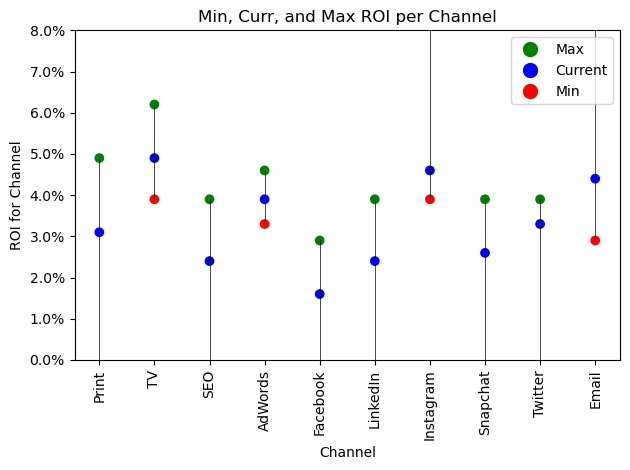

In [40]:

# Plot min, current and max ROIs

slack_df.replace(np.inf, 100, inplace=True)
slack_df.replace(-np.inf, -100, inplace=True)

for i, row in slack_df.iterrows():
    x = [row['Channel']] * 3
    y = [row['Min ROI'], row['Curr ROI'], row['Max ROI']]
    plt.scatter(x, y, color=['r', 'b', 'g'])
    plt.plot(x, y, color='black', linestyle='-', linewidth=0.5)

plt.ylim(0, 0.08)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

red_dot = mlines.Line2D([], [], color='r', marker='o', linestyle='None', markersize=10, label='Min')
blue_dot = mlines.Line2D([], [], color='b', marker='o', linestyle='None', markersize=10, label='Current')
green_dot = mlines.Line2D([], [], color='g', marker='o', linestyle='None', markersize=10, label='Max')

plt.legend(handles=[green_dot, blue_dot, red_dot],loc='upper right')
plt.xlabel('Channel')
plt.ylabel('ROI for Channel')
plt.title('Min, Curr, and Max ROI per Channel')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()


## Question 7 - Monthly ROI

In [41]:
# Drop Unnamed column
df_month_channel_roi.rename(columns={'Unnamed: 0':'Months'}, inplace=True)
# Convert % to decimal
df_month_channel_roi[var_names] = df_month_channel_roi[var_names].apply(lambda x : x/100)

df_month_channel_roi

,Months,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
0,January,0.040,0.036,0.024,0.039,0.030,0.035,0.036,0.0225,0.035,0.035
1,February,0.040,0.039,0.027,0.038,0.043,0.032,0.027,0.0180,0.037,0.035
2,March,0.035,0.029,0.031,0.038,0.024,0.041,0.037,0.0260,0.042,0.025
3,April,0.038,0.031,0.024,0.044,0.024,0.038,0.037,0.0250,0.036,0.029
4,May,0.035,0.032,0.019,0.034,0.027,0.027,0.039,0.0220,0.045,0.039
5,June,0.040,0.032,0.027,0.034,0.034,0.030,0.045,0.0210,0.038,0.041
6,July,0.039,0.036,0.020,0.044,0.039,0.037,0.043,0.0180,0.040,0.038
7,August,0.042,0.033,0.028,0.042,0.020,0.037,0.036,0.0150,0.044,0.043
8,September,0.041,0.028,0.025,0.042,0.029,0.037,0.028,0.0250,0.040,0.034
9,October,0.030,0.030,0.031,0.046,0.031,0.033,0.032,0.0230,0.025,0.032


In [42]:
# List of months
months = df_month_channel_roi['Months'].tolist()

# Create variable names by taking column names
var_names = roi_csv_file_df.columns.tolist()[1:]

# Initialize an empty list to store the budget allocation for each month
monthly_budget_allocations = []
# Initialize a variable to keep track of the cumulative return
cumulative_return = 0
reinvestment_amount = 0

In [43]:
for month in months:
    # Convert the values in rois to numeric values (excluding the 'Month' column)
    rois = df_month_channel_roi.loc[months.index(month)].values[1:]
    rois = [float(value) for value in rois]

    # Calculate the budget for the current month, including reinvestment
    budget = 10 + reinvestment_amount

    # Create a new model for each month
    model = gp.Model("Budget_Allocation")

    modelX = model.addVars(len(var_names), name="x")

    # Define the objective function for the current month using rois
    model.setObjective(gp.quicksum(rois[i] * modelX[i] for i in range(len(var_names))), gp.GRB.MAXIMIZE)

    # Adding Budget constraint using index since all should have <= 10M constraint anyways
    model.addConstr(gp.quicksum(modelX[i] for i in range(num_vars)) <= budget, name="Budget_Constr")

    # Add constraints using variable names assigned by column names
    model.addConstr(modelX[var_names.index("Print")] + modelX[var_names.index("TV")] <= modelX[var_names.index("Facebook")] + modelX[var_names.index("Email")], name="Print_TV_Constr")
    model.addConstr(modelX[var_names.index("Facebook")] + modelX[var_names.index("LinkedIn")] + modelX[var_names.index("Instagram")] + modelX[var_names.index("Snapchat")] + modelX[var_names.index("Twitter")] >= 2 * (modelX[var_names.index("SEO")] + modelX[var_names.index("AdWords")]), name="Social_Media_Constr")

    # Again adding Max Alloc constraint using index since all should have <= 3M constraint anyways
    for i in range(num_vars):
        model.addConstr(modelX[i] <= 3, name=f"Max_Alloc_Constraint_{i}")

    # Set the output flag to 0 to suppress Gurobi's output. Optimize the model for the current month
    model.Params.OutputFlag = 0
    model.optimize()

    # Calculate the return for the current month
    current_month_return = sum(rois[i] * modelX[i].x for i in range(len(var_names)))
    # Calculate the reinvestment amount (half of the return)
    reinvestment_amount = current_month_return * 0.5

    # Store the budget allocation for the current month
    budget_allocation = [month] + [v.x for v in model.getVars()]
    monthly_budget_allocations.append(budget_allocation)

In [44]:
df_allocations = pd.DataFrame(monthly_budget_allocations, columns=['Month'] + var_names).T

df_allocations.columns = df_allocations.iloc[0]
df_allocations = df_allocations.apply(lambda x: pd.to_numeric(x, errors='coerce').round(3))

df_allocations = df_allocations[1:]
df_allocations

Month,January,February,March,April,May,June,July,August,September,October,November,December
Print,3.000,3.000,0.000,0.000,1.2,3.000,0.000,2.714,0.609,0.000,3.000,3.00
TV,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,2.11
SEO,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.00
AdWords,1.333,2.396,3.000,3.000,0.0,0.000,3.000,1.500,3.000,3.000,1.186,0.00
Facebook,0.000,3.000,0.000,0.000,0.0,0.000,1.212,0.000,0.000,0.000,0.000,3.00
LinkedIn,0.000,0.000,3.000,3.000,0.0,0.000,0.000,0.000,3.000,3.000,0.000,0.00
Instagram,2.667,0.000,1.203,3.000,3.0,3.000,3.000,0.000,0.000,3.000,3.000,0.00
Snapchat,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.00
Twitter,0.000,1.791,3.000,1.204,3.0,1.206,3.000,3.000,3.000,0.000,0.000,0.00
Email,3.000,0.000,0.000,0.000,3.0,3.000,0.000,3.000,0.609,1.201,3.000,2.11


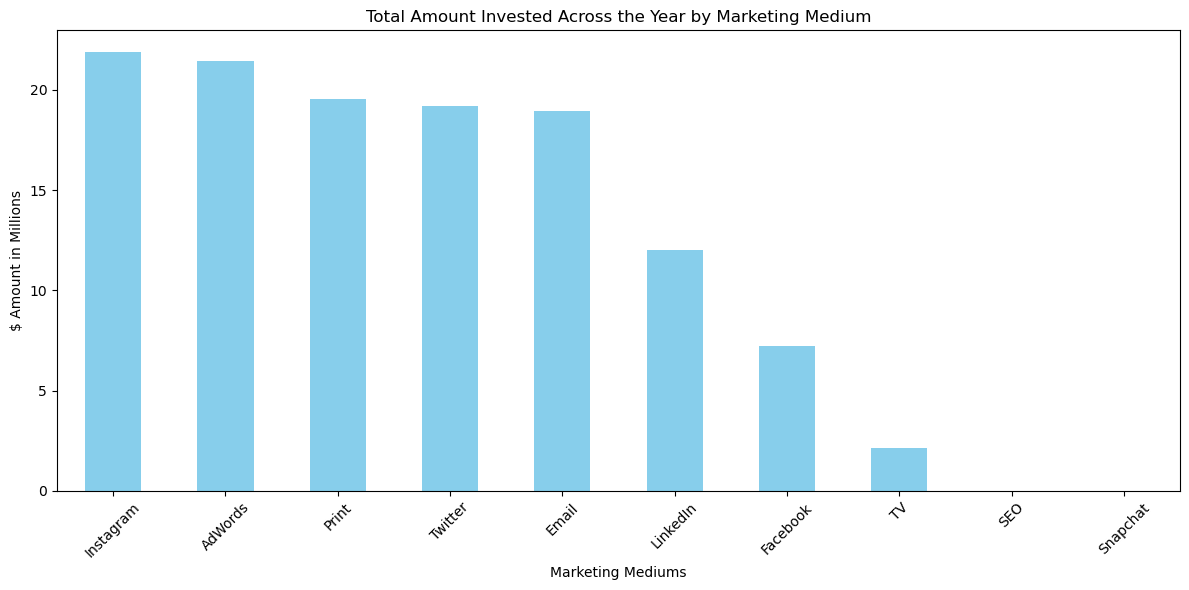

In [45]:

# Calculate the sum of columns and sort them in descending order
sum_sorted = df_allocations.T.sum().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sum_sorted.plot(kind='bar', color='skyblue')
plt.title("Total Amount Invested Across the Year by Marketing Medium")
plt.xlabel("Marketing Mediums")
plt.ylabel("$ Amount in Millions")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

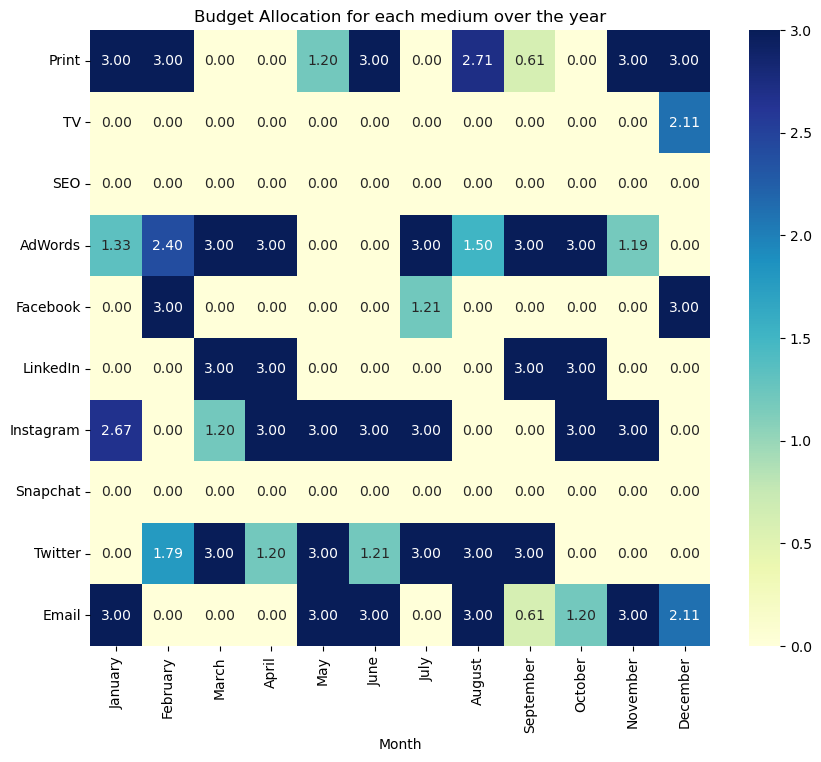

In [46]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_allocations, cmap="YlGnBu", annot=True, fmt=".2f", cbar=True)
plt.title("Budget Allocation for each medium over the year")
plt.show()

## Question 8 - Stable Budget

In [47]:
df_allocations_new = df_allocations.copy()

for col in df_allocations.columns[1:]:
    df_allocations_new[col] = df_allocations[col] - df_allocations[df_allocations.columns[df_allocations.columns.get_loc(col) - 1]]

df_allocations_new['January'] = 0

df_allocations_new

Month,January,February,March,April,May,June,July,August,September,October,November,December
Print,0,0.000,-3.000,0.000,1.200,1.800,-3.000,2.714,-2.105,-0.609,3.000,0.000
TV,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.110
SEO,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
AdWords,0,1.063,0.604,0.000,-3.000,0.000,3.000,-1.500,1.500,0.000,-1.814,-1.186
Facebook,0,3.000,-3.000,0.000,0.000,0.000,1.212,-1.212,0.000,0.000,0.000,3.000
LinkedIn,0,0.000,3.000,0.000,-3.000,0.000,0.000,0.000,3.000,0.000,-3.000,0.000
Instagram,0,-2.667,1.203,1.797,0.000,0.000,0.000,-3.000,0.000,3.000,0.000,-3.000
Snapchat,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Twitter,0,1.791,1.209,-1.796,1.796,-1.794,1.794,0.000,0.000,-3.000,0.000,0.000
Email,0,-3.000,0.000,0.000,3.000,0.000,-3.000,3.000,-2.391,0.592,1.799,-0.890


> The budget isn't stable as we can see an allocation difference between months across channels which is greater than the $1M limit.

> To model an optimization model which gives us consitent budget, we can add more constraints for each month except Ja